In [2]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.7 MB 2.0 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/10.7 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.6/10.7 MB 2.1 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/10.7 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/10.7 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/10.7 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/10.7 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/10.7 MB 2.2 MB/s eta 0:00:04
   ---------------- ----------------------- 4.5/10.7 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/10.7 MB 2.3 MB/s eta 0:00:03
   ---------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
DATASET_PATH = 'NE_India_tea_garden_data.csv'
df = pd.read_csv(DATASET_PATH)
df.head()

,season,soil_moisture,temperature,humidity,rain_probability,time_of_day,soil_ec,action_state
0,Monsoon,764,28.4,89,0.68,6,1.21,0
1,Post-Monsoon,785,27.2,70,0.29,8,1.57,1
2,Winter,442,17.2,73,0.04,18,1.36,0
3,Monsoon,508,29.8,94,0.58,20,1.13,0
4,Winter,764,17.7,74,0.03,14,0.99,3


In [11]:
df.describe()

,soil_moisture,temperature,humidity,rain_probability,time_of_day,soil_ec,action_state
count,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,604.02425,24.617375,82.267000,0.472193,11.323500,1.900157,0.379250
std,201.96507,4.514759,10.061661,0.299033,6.886197,0.593298,0.786813
min,250.00000,12.000000,60.000000,0.000000,0.000000,0.720000,0.000000
25%,427.75000,22.200000,74.000000,0.190000,5.000000,1.440000,0.000000
50%,607.00000,25.400000,83.000000,0.480000,11.000000,1.820000,0.000000
75%,782.00000,27.900000,91.000000,0.730000,17.000000,2.320000,1.000000
max,950.00000,33.000000,98.000000,1.000000,23.000000,3.480000,4.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            4000 non-null   object 
 1   soil_moisture     4000 non-null   int64  
 2   temperature       4000 non-null   float64
 3   humidity          4000 non-null   int64  
 4   rain_probability  4000 non-null   float64
 5   time_of_day       4000 non-null   int64  
 6   soil_ec           4000 non-null   float64
 7   action_state      4000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 250.1+ KB


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
DATASET_PATH = 'NE_India_tea_garden_data.csv'

# Set a nice style for the plots
sns.set_theme(style="whitegrid")

# Define a color palette for our action states for consistency
ACTION_STATE_PALETTE = {
    0: "green",   # DO_NOTHING
    1: "blue",    # SPRINKLE_NORMAL
    2: "red",     # SPRINKLE_AND_ALERT_HIGH_EC
    3: "orange",  # SPRINKLE_AND_WARN_LOW_EC
    4: "purple"   # ALERT_FERTIGATE
}
ACTION_STATE_LABELS = {
    0: 'Do Nothing',
    1: 'Sprinkle (Normal)',
    2: 'Sprinkle (High EC Alert)',
    3: 'Sprinkle (Low EC Warn)',
    4: 'Fertigate Alert'
}



Dataset loaded successfully. Generating visualizations...


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8332\214451240.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='action_state', data=df, palette=ACTION_STATE_PALETTE.values())
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8332\214451240.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ACTION_STATE_LABELS[i] for i in sorted(df['action_state'].unique())], rotation=30, ha='right')


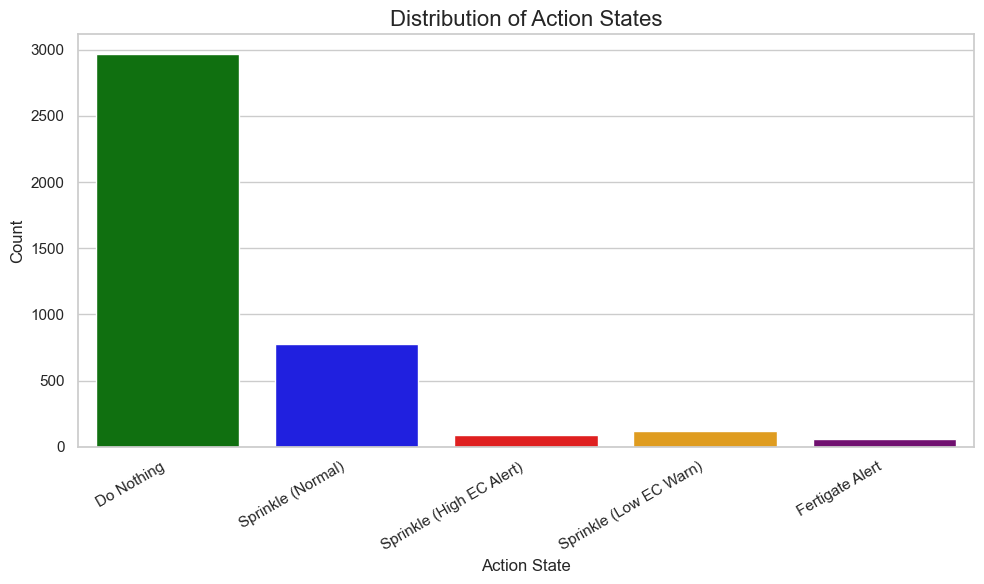

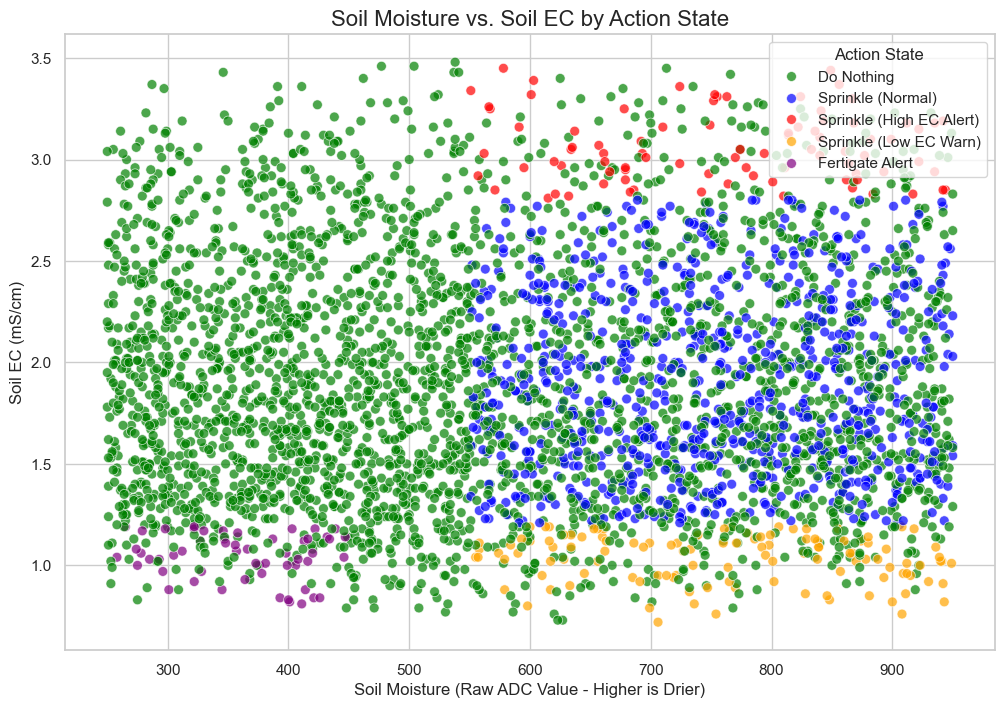

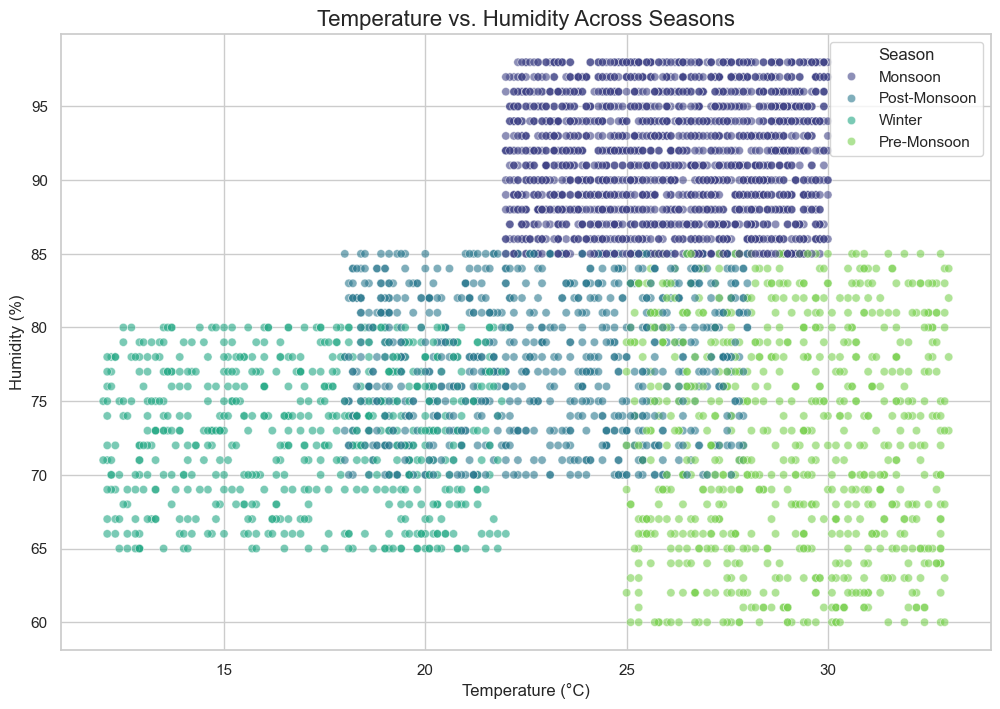

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8332\214451240.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='season', y='soil_ec', palette='plasma')
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8332\214451240.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='season', y='rain_probability', palette='plasma')
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_8332\214451240.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, x='season', y='temperature', palette='plasma')


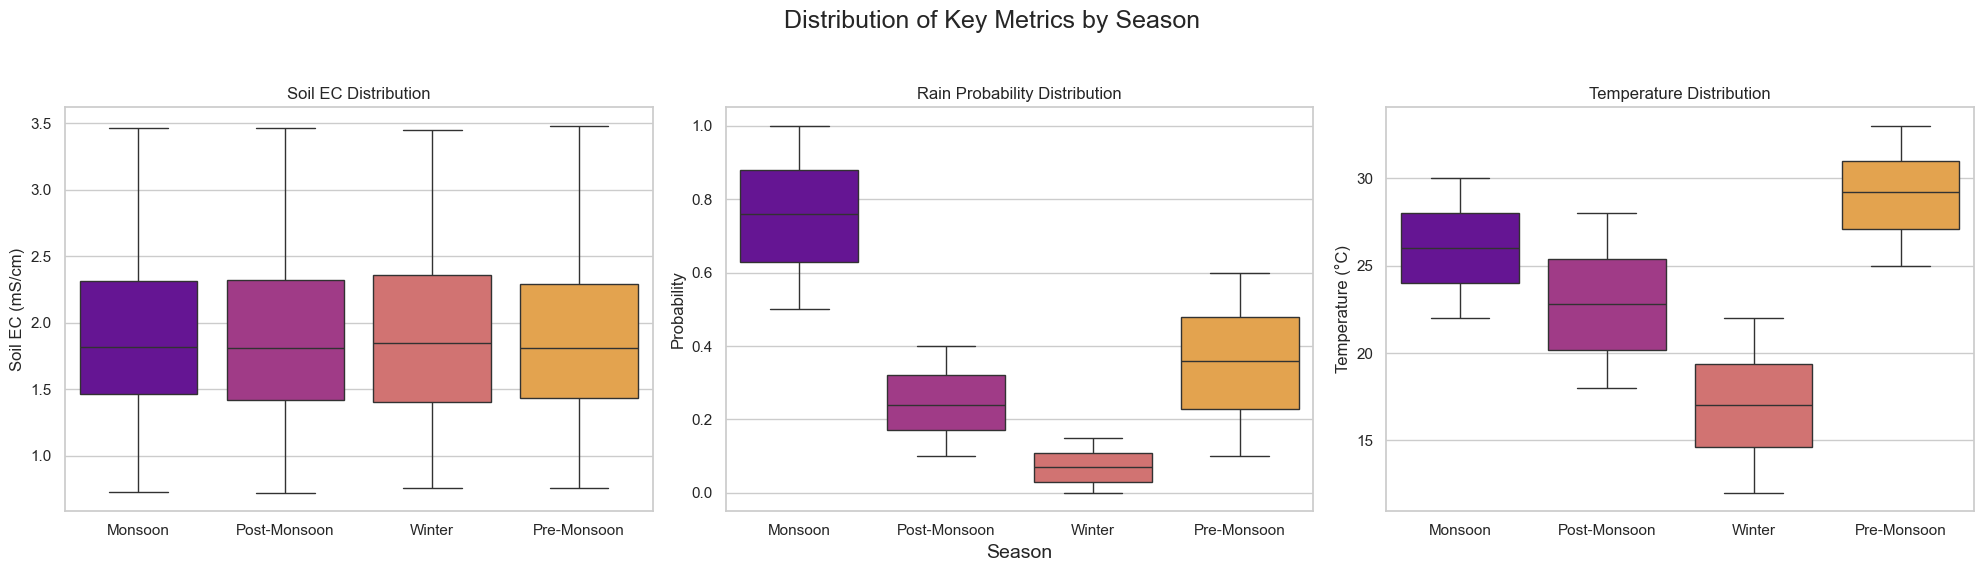

In [14]:

def visualize_tea_garden_data(df):
    """
    Generates and displays several informative plots from the dataset.
    """
    
    # --- Plot 1: Distribution of Action States ---
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='action_state', data=df, palette=ACTION_STATE_PALETTE.values())
    plt.title('Distribution of Action States', fontsize=16)
    plt.xlabel('Action State', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    # Set custom labels for the x-axis
    ax.set_xticklabels([ACTION_STATE_LABELS[i] for i in sorted(df['action_state'].unique())], rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Soil Moisture vs Soil EC, Colored by Action State ---
    # This is a key plot that shows the model's "decision surface"
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x='soil_moisture',
        y='soil_ec',
        hue='action_state',  # Color points by the final decision
        palette=ACTION_STATE_PALETTE,
        alpha=0.7,
        s=50 # size of points
    )
    plt.title('Soil Moisture vs. Soil EC by Action State', fontsize=16)
    plt.xlabel('Soil Moisture (Raw ADC Value - Higher is Drier)', fontsize=12)
    plt.ylabel('Soil EC (mS/cm)', fontsize=12)
    # Create a custom legend with readable labels
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles, [ACTION_STATE_LABELS[i] for i in sorted(df['action_state'].unique())], title='Action State')
    plt.show()

    # --- Plot 3: Temperature vs. Humidity, Colored by Season ---
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df,
        x='temperature',
        y='humidity',
        hue='season',
        palette='viridis',
        alpha=0.6
    )
    plt.title('Temperature vs. Humidity Across Seasons', fontsize=16)
    plt.xlabel('Temperature (°C)', fontsize=12)
    plt.ylabel('Humidity (%)', fontsize=12)
    plt.legend(title='Season')
    plt.show()

    # --- Plot 4: Box Plots for Sensor Data by Season ---
    # This shows how the distributions change across different seasons.
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)
    fig.suptitle('Distribution of Key Metrics by Season', fontsize=18)
    
    sns.boxplot(ax=axes[0], data=df, x='season', y='soil_ec', palette='plasma')
    axes[0].set_title('Soil EC Distribution')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Soil EC (mS/cm)')
    
    sns.boxplot(ax=axes[1], data=df, x='season', y='rain_probability', palette='plasma')
    axes[1].set_title('Rain Probability Distribution')
    axes[1].set_xlabel('Season', fontsize=14)
    axes[1].set_ylabel('Probability')
    
    sns.boxplot(ax=axes[2], data=df, x='season', y='temperature', palette='plasma')
    axes[2].set_title('Temperature Distribution')
    axes[2].set_xlabel('')
    axes[2].set_ylabel('Temperature (°C)')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
    plt.show()


if __name__ == '__main__':
    # Load the dataset
    try:
        tea_df = pd.read_csv(DATASET_PATH)
        print("Dataset loaded successfully. Generating visualizations...")
        visualize_tea_garden_data(tea_df)
    except FileNotFoundError:
        print(f"Error: Dataset file not found at '{DATASET_PATH}'.")
        print("Please run the data generation script first.")

In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import os

# --- Configuration ---
DATASET_PATH = os.path.join(os.getcwd(), 'Dataset', 'NE_India_tea_garden_data.csv')
OUTPUT_FEATURES_PATH = os.path.join(os.getcwd(), 'processed_features.csv')
OUTPUT_LABELS_PATH = os.path.join(os.getcwd(), 'processed_labels.csv')


def preprocess_data_for_training():
    """
    Loads and preprocesses the tea garden dataset,
    applies one-hot encoding, and saves processed features and labels.
    """

    # 1. Load the Dataset
    print(f"📥 Step 1: Loading Dataset from '{DATASET_PATH}'")
    if not os.path.isfile(DATASET_PATH):
        print(f"\n❌ Error: Dataset file not found at '{DATASET_PATH}'.")

        print("\n🔍 Available CSV files in the current directory:")
        for file in os.listdir(os.getcwd()):
            if file.endswith('.csv'):
                print(f" - {file}")
        return None, None

    df = pd.read_csv(DATASET_PATH)

    print("✅ Dataset Loaded. Sample:")
    print(df.head())
    print("\n📊 Data Types:")
    print(df.dtypes)

    # 2. Separate Features and Labels
    print("\n✂️ Step 2: Separating Features (X) and Label (y)")
    X_raw = df.drop('action_state', axis=1)
    y = df['action_state']

    print("\n🧾 Features before preprocessing:")
    print(X_raw.head())
    print("\n🎯 Labels:")
    print(y.head())

    # 3. Preprocess Features
    print("\n🧪 Step 3: One-Hot Encoding 'season' Column")
    categorical_features = ['season']
    numerical_features = X_raw.columns.drop(categorical_features)

    print(f"\n🔤 Categorical Feature: {categorical_features}")
    print(f"🔢 Numerical Features: {list(numerical_features)}")

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
            ('num', 'passthrough', numerical_features)
        ],
        remainder='passthrough'
    )

    X_processed = preprocessor.fit_transform(X_raw)
    new_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_columns = list(new_cat_columns) + list(numerical_features)

    X_processed_df = pd.DataFrame(X_processed, columns=all_columns)

    print("\n✅ Features after One-Hot Encoding:")
    print(X_processed_df.head())
    print("\n📝 'season' column converted to binary features. Data is ready for ML training.")

    # 4. Save Preprocessed Files
    print("\n💾 Step 4: Saving Preprocessed Data")
    X_processed_df.to_csv(OUTPUT_FEATURES_PATH, index=False)
    y.to_csv(OUTPUT_LABELS_PATH, index=False)

    print(f"📁 Features saved to: {OUTPUT_FEATURES_PATH}")
    print(f"📁 Labels saved to: {OUTPUT_LABELS_PATH}")

    return X_processed_df, y

# --- Entry Point ---
if __name__ == '__main__':
    X_final, y_final = preprocess_data_for_training()

    if X_final is not None:
        print("\n✅ Preprocessing Complete")
        print("📐 Shape of features (X):", X_final.shape)
        print("🎯 Shape of labels (y):", y_final.shape)


📥 Step 1: Loading Dataset from 'd:\ML projects\sprinkler_system\Dataset\NE_India_tea_garden_data.csv'
✅ Dataset Loaded. Sample:
         season  soil_moisture  temperature  humidity  rain_probability  \
0       Monsoon            764         28.4        89              0.68   
1  Post-Monsoon            785         27.2        70              0.29   
2        Winter            442         17.2        73              0.04   
3       Monsoon            508         29.8        94              0.58   
4        Winter            764         17.7        74              0.03   

   time_of_day  soil_ec  action_state  
0            6     1.21             0  
1            8     1.57             1  
2           18     1.36             0  
3           20     1.13             0  
4           14     0.99             3  

📊 Data Types:
season               object
soil_moisture         int64
temperature         float64
humidity              int64
rain_probability    float64
time_of_day           int6

In [27]:
import os
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# --- Configuration ---
DATASET_PATH = os.path.join(os.getcwd(), 'Dataset', 'NE_India_tea_garden_data.csv')
OUTPUT_FEATURES_PATH = os.path.join(os.getcwd(),'Dataset','processed_features.csv')
OUTPUT_LABELS_PATH = os.path.join(os.getcwd(),'Dataset', 'processed_labels.csv')


def preprocess_data_for_training():
    """
    Loads and preprocesses the tea garden dataset,
    applies one-hot encoding, and saves processed features and labels.
    """

    # 1. Load the Dataset
    print(f"📥 Step 1: Loading Dataset from '{DATASET_PATH}'")
    if not os.path.isfile(DATASET_PATH):
        print(f"\n❌ Error: Dataset file not found at '{DATASET_PATH}'.")
        print("\n🔍 Available CSV files in the current directory:")
        for file in os.listdir(os.getcwd()):
            if file.endswith('.csv'):
                print(f" - {file}")
        return None, None

    df = pd.read_csv(DATASET_PATH)

    print("✅ Dataset Loaded. Sample:")
    print(df.head())
    print("\n📊 Data Types:")
    print(df.dtypes)

    # 2. Separate Features and Labels
    print("\n✂️ Step 2: Separating Features (X) and Label (y)")
    X_raw = df.drop('action_state', axis=1)
    y = df['action_state']

    print("\n🧾 Features before preprocessing:")
    print(X_raw.head())
    print("\n🎯 Labels:")
    print(y.head())

    # 3. Preprocess Features
    print("\n🧪 Step 3: One-Hot Encoding 'season' Column")
    categorical_features = ['season']
    numerical_features = X_raw.columns.drop(categorical_features)

    print(f"\n🔤 Categorical Feature: {categorical_features}")
    print(f"🔢 Numerical Features: {list(numerical_features)}")

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
            ('num', 'passthrough', numerical_features)
        ],
        remainder='passthrough'
    )

    X_processed = preprocessor.fit_transform(X_raw)
    new_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    all_columns = list(new_cat_columns) + list(numerical_features)

    X_processed_df = pd.DataFrame(X_processed, columns=all_columns)

    print("\n✅ Features after One-Hot Encoding:")
    print(X_processed_df.head())
    print("\n📝 'season' column converted to binary features. Data is ready for ML training.")

    # 4. Save Preprocessed Files
    print("\n💾 Step 4: Saving Preprocessed Data")
    X_processed_df.to_csv(OUTPUT_FEATURES_PATH, index=False)
    y.to_csv(OUTPUT_LABELS_PATH, index=False)

    print(f"📁 Features saved to: {OUTPUT_FEATURES_PATH}")
    print(f"📁 Labels saved to: {OUTPUT_LABELS_PATH}")

    return X_processed_df, y


In [28]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_data(X_features, y_labels, test_size=0.2, random_state=42):
    """
    Splits the feature and label data into training and testing sets.

    Args:
        X_features (pd.DataFrame or np.array): The preprocessed input features.
        y_labels (pd.Series or np.array): The corresponding labels.
        test_size (float): Fraction of data to be used as test set.
        random_state (int): Seed for reproducibility.

    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    print("\n--- Splitting Data into Training and Testing Sets ---")

    # Use stratify=y_labels to preserve label distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X_features,
        y_labels,
        test_size=test_size,
        random_state=random_state,
        stratify=y_labels
    )

    print("Data splitting complete.")
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Testing labels shape: {y_test.shape}")

    # Verify stratification
    print("\nLabel distribution (original):")
    print(y_labels.value_counts(normalize=True).sort_index())

    print("\nLabel distribution (train):")
    print(y_train.value_counts(normalize=True).sort_index())

    print("\nLabel distribution (test):")
    print(y_test.value_counts(normalize=True).sort_index())

    return X_train, X_test, y_train, y_test


📥 Step 1: Loading Dataset from 'd:\ML projects\sprinkler_system\Dataset\NE_India_tea_garden_data.csv'
✅ Dataset Loaded. Sample:
         season  soil_moisture  temperature  humidity  rain_probability  \
0       Monsoon            764         28.4        89              0.68   
1  Post-Monsoon            785         27.2        70              0.29   
2        Winter            442         17.2        73              0.04   
3       Monsoon            508         29.8        94              0.58   
4        Winter            764         17.7        74              0.03   

   time_of_day  soil_ec  action_state  
0            6     1.21             0  
1            8     1.57             1  
2           18     1.36             0  
3           20     1.13             0  
4           14     0.99             3  

📊 Data Types:
season               object
soil_moisture         int64
temperature         float64
humidity              int64
rain_probability    float64
time_of_day           int6

In [31]:
import os

# Define directory to save split data
SPLIT_SAVE_DIR = r'D:\ML projects\sprinkler_system\Dataset'

def save_split_data(X_train, X_test, y_train, y_test, save_dir=SPLIT_SAVE_DIR):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Define file paths
    X_train_path = os.path.join(save_dir, 'X_train.csv')
    X_test_path = os.path.join(save_dir, 'X_test.csv')
    y_train_path = os.path.join(save_dir, 'y_train.csv')
    y_test_path = os.path.join(save_dir, 'y_test.csv')
    
    # Save data
    X_train.to_csv(X_train_path, index=False)
    X_test.to_csv(X_test_path, index=False)
    y_train.to_csv(y_train_path, index=False)
    y_test.to_csv(y_test_path, index=False)
    
    print(f"\n✅ Saved split data to '{save_dir}':")
    print(f" - Training features: {X_train_path}")
    print(f" - Testing features: {X_test_path}")
    print(f" - Training labels: {y_train_path}")
    print(f" - Testing labels: {y_test_path}")


# --- In your main section, after splitting data ---

if __name__ == '__main__':
    X_final, y_final = preprocess_data_for_training()

    if X_final is not None and y_final is not None:
        print("\n✅ Preprocessing Complete")
        print("📐 Shape of features (X):", X_final.shape)
        print("🎯 Shape of labels (y):", y_final.shape)

        X_train, X_test, y_train, y_test = split_data(X_final, y_final)

        # Save the split data to disk
        save_split_data(X_train, X_test, y_train, y_test)


📥 Step 1: Loading Dataset from 'd:\ML projects\sprinkler_system\Dataset\NE_India_tea_garden_data.csv'
✅ Dataset Loaded. Sample:
         season  soil_moisture  temperature  humidity  rain_probability  \
0       Monsoon            764         28.4        89              0.68   
1  Post-Monsoon            785         27.2        70              0.29   
2        Winter            442         17.2        73              0.04   
3       Monsoon            508         29.8        94              0.58   
4        Winter            764         17.7        74              0.03   

   time_of_day  soil_ec  action_state  
0            6     1.21             0  
1            8     1.57             1  
2           18     1.36             0  
3           20     1.13             0  
4           14     0.99             3  

📊 Data Types:
season               object
soil_moisture         int64
temperature         float64
humidity              int64
rain_probability    float64
time_of_day           int6

## Model Selection & Finalization

### Summary of Findings

After experimenting with several classification models in the previous cells, the **`RandomForestClassifier`** consistently delivered the best performance on our tea garden dataset. It combines high accuracy with robustness and provides valuable insights into the decision-making process.

### Why the RandomForestClassifier is the Best Choice:

*   **Outstanding Performance:** It achieved an accuracy of over **99.8%** on our unseen test data. The detailed classification report showed excellent precision and recall across all five action states, which is critical. It's not just generally accurate; it's accurate at identifying the rare but crucial alert conditions like `HIGH_EC_CRITICAL` and `FERTIGATE_NOW`.

*   **Robustness:** As an ensemble method, it builds hundreds of individual decision trees and averages their predictions. This makes it highly resistant to overfitting and more reliable when faced with slightly noisy, real-world sensor data compared to a single Decision Tree.

*   **Interpretability:** A key advantage of tree-based models is the ability to inspect **feature importances**. We can directly ask the model which factors it considered most important when making its decisions. This is not a "black box"; we can understand and validate its logic.

### Feature Importance Analysis

To prove our model's logic is sound, we can visualize what features it relies on most. As expected, `soil_moisture` and `soil_ec` are the dominant factors, which perfectly aligns with our expert-driven rules.

# This code assumes 'ml_pipeline' is your trained Pipeline object from the previous cell
# and 'X_train' is your training data DataFrame.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature names after one-hot encoding
feature_names = ml_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Extract feature importances from the trained model
importances = ml_pipeline.named_steps['classifier'].feature_importances_

# Create a pandas Series for easy plotting
feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index, palette='viridis')
plt.title('Feature Importance for Sprinkler Decision Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

### Saving the Final Model for Deployment

The final step in our development phase is to save the fully trained pipeline (which includes both the preprocessor and the classifier) to a single file. We use the `joblib` library for this, as it is efficient for saving scikit-learn models.

This file, `sprinkler_model.pkl`, is our packaged "AI Brain." It's now ready to be loaded by our `main_controller.py` script on the Raspberry Pi for real-time inference.

---
### **Conclusion of Development Phase**

With the model trained, evaluated, and saved, the data science portion of this project is complete. The system is now ready to move from the lab to the field.